# Simple linear regression from scratch

In this practical, we embark on an exciting journey to build a Simple Linear Regression model from scratch. Our goal is to peel back the layers of one of the most fundamental algorithms in machine learning and statistics, providing a hands-on experience that bridges theory with practical application. By constructing this model step by step, we aim to gain a deeper understanding of its mechanics and appreciate the elegance of linear regression as a tool for making predictions. Whether you're a student, a budding data scientist, or simply curious about machine learning, this project is designed to demystify the process of creating a predictive model and lay a solid foundation for further exploration in the field.



## About the data

In this practical, we will be working with a dataset that encapsulates the relationship between marketing budgets allocated to TV advertisements and the corresponding sales outcomes. The dataset contains two primary columns:


**TV**: This column represents the marketing budget allocated to TV advertisements for a particular product or service. It reflects the investment made by a company in television-based marketing campaigns over a specific period.


**Sales**: This column records the number of sales achieved following the corresponding TV advertisement budget. It is a direct indicator of the effectiveness of TV marketing expenditures in driving sales for the product or service.

## What is Simple Linear Regression?

Simple Linear Regression is a statistical method that allows us to understand and predict the relationship between two variables. Specifically, it focuses on the case where we have one independent variable (X) and one dependent variable (Y), hence the term 'simple'. The core idea is to find the best-fitting straight line through the data points that minimizes the differences between the observed values and the values predicted by the model. This line can then be used to predict future outcomes based on new inputs of the independent variable.

Formulas in Simple Linear Regression
In Simple Linear Regression, the relationship between the independent variable (X) and the dependent variable (Y) is represented by the following equation:

$$
Y = β0 + β1X
$$

Y is the dependent variable,
X is the independent variable,
β0 is the intercept of the regression line on the Y-axis,
β1 is the slope of the regression line, representing the change in Y for a unit change in X,


The aim of Simple Linear Regression is to find the values of β0 and β1 that minimize the sum of the squared differences between the observed values and the values predicted by our model. This method is known as Ordinary Least Squares (OLS). The formulas for calculating β0 and β1 are:

$$
β1 = \frac{\sum ((X_i - \bar{X})(Y_i - \bar{Y}))}{\sum ((X_i - \bar{X})^2)}
$$

$$
β0 = \bar{Y} - β1\bar{X}
$$

where X̄ and Ȳ are the mean values of the independent and dependent variables, respectively.


By applying these formulas, we can estimate the coefficients of the regression line that best fits our data. This enables us to make predictions about the dependent variable using new inputs for the independent variable.

## Let's start

Load the dataset from the file `data.csv`

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


Display the first 3 rows

In [ ]:
df.head(3)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3


Display the last 3 rows

In [ ]:
df.tail(3)

,TV,Sales
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


Display some informations about the dataset, use the functions `info` and `describe`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [ ]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


Now plot the dataset. You can use plotly if you want or direcly the `plot` function from pandas.

We want to put the `TV` column on the X axis and `Sales` column on the Y axis.

Use a scatter plot

<Axes: xlabel='TV', ylabel='Sales'>

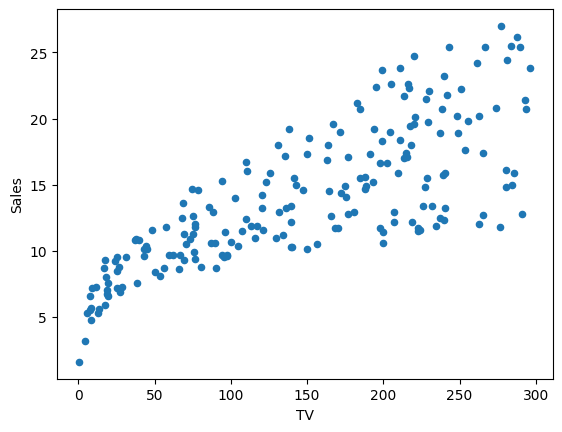

In [ ]:
df.plot(x='TV', y='Sales', kind='scatter')

What can you conclude from the plot ?

Do we have a linear relation between our variables ?

In [ ]:
# FIXME

### Now let's build the model from scratch

Now that we have explored our dataset and understood the relationship between the TV marketing budget and sales outcomes, we are ready to build our Simple Linear Regression model. This model will help us predict sales based on the TV advertisement budget. Unlike using pre-built functions from libraries, building the model from scratch will provide us with deeper insights into the underlying mathematical principles.

In [ ]:
import numpy as np

class MySimpleLinearRegression:
    def __init__(self):
        '''
        Initialize the parameters of the simple Linear regression: beta0 and beta1
        '''
        self.beta0 = 0
        self.beta1 = 0

    def fit(self, x: np.array, y: np.array):
        '''
        Function that is used to learn the beta parameters from the data

        x: is your feature column in a numpy array.
        y: is your label column in a numpy array. We want to predict this variable
        '''
        # Calculate means
        mean_x = x.mean()
        mean_y = y.mean()

        # Calculate β1 (slope) and β0 (intercept)
        numerator = np.sum((x - mean_x) * (y - mean_y))
        denominator = np.sum((x - mean_x)**2)
        self.beta1 = numerator / denominator
        self.beta0 = mean_y - self.beta1 * mean_x


    def predict(self, x: float) -> float:
        '''
        The function that will be used to make a prediction with our learnt parameters
        '''
        return self.beta1 * x + self.beta0

Now train your model on the data

In [ ]:
model = MySimpleLinearRegression()

In [ ]:
model.fit(df['TV'].to_numpy(), df['Sales'].to_numpy())

Now display the parameters beta0 and beta1

In [ ]:
model.beta0, model.beta1

(7.0325935491276965, 0.047536640433019736)

Call the prediction function with new x values

Try:

x = 5

x = 50

x = 100

x = 500

x = 1000

In [ ]:
values = [5, 50, 100, 500, 1000]

print("Marketing budget -- Number of sales")
for val in values:
    pred = model.predict(x=val)
    print(f"{val} -- {pred}")

Marketing budget -- Number of sales
5 -- 7.270276751292795
50 -- 9.409425570778684
100 -- 11.78625759242967
500 -- 30.800913765637564
1000 -- 54.56923398214743


In [ ]:
import matplotlib.pyplot as plt

### Plot

Plot the regression line on your data

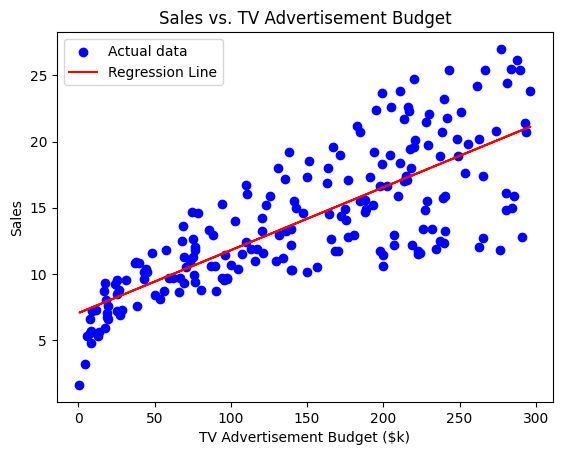

In [ ]:
regression_line = model.beta0 + model.beta1 * df['TV']

# Plotting the actual data points
plt.scatter(df['TV'], df['Sales'], color='blue', label='Actual data')

# Plotting the regression line
plt.plot(df['TV'], regression_line, color='red', label='Regression Line')

# Adding some helpful labels and title
plt.xlabel('TV Advertisement Budget ($k)')
plt.ylabel('Sales')
plt.title('Sales vs. TV Advertisement Budget')
plt.legend()

# Display the plot
plt.show()